In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
# Import data
file_path = 'C:/Users/User/Documents/SKRIPSI/OPTIMASI PER PENYAKIT/Dataset_Skripsi_Processed.csv'  # Path absolut
df = pd.read_csv(file_path)

In [3]:
# Filter data untuk P01
df_p01 = df[df['kode_penyakit'] == 'P01']
cf_pakar = df_p01['cf_pakar'].values

## Inisialisasi Parameter

In [4]:
# Parameter PSO
c1 = 2.0
c2 = 2.0
n_particles = 10
n_iterations = 10
np.random.seed(42)

## Fungsi Fitness

In [5]:
# Fungsi fitness untuk mengukur sejauh mana posisi partikel mendekati cf_pakar
def fitness(position, cf_pakar):
    return np.mean((cf_pakar - position) ** 2, axis=1)  # MSE 

## Implementasi

In [6]:
# Fungsi PSO
def run_pso(cf_pakar, w_max, w_min):
    fitness_best_results = []
    
    for trial in range(10):
        position = np.random.uniform(0.0, 1.0, (n_particles, len(cf_pakar)))
        velocity = np.random.uniform(-0.1, 0.1, (n_particles, len(cf_pakar)))
        pbest = position.copy()
        pbest_score = np.array([np.mean(np.abs(cf_pakar - p)) for p in position])
        gbest = pbest[np.argmin(pbest_score)]
        gbest_score = np.min(pbest_score)

        for iteration in range(n_iterations):
            w = w_max - (w_max - w_min) * (iteration / n_iterations)
            for i in range(n_particles):
                r1 = np.random.rand(len(cf_pakar))
                r2 = np.random.rand(len(cf_pakar))
                velocity[i] = w * velocity[i] + c1 * r1 * (pbest[i] - position[i]) + c2 * r2 * (gbest - position[i])
                position[i] += velocity[i]
                position[i] = np.clip(position[i], 0.0, 1.0)

            score = fitness(position, cf_pakar)
            for i in range(n_particles):
                if score[i] < pbest_score[i]:
                    pbest[i] = position[i]
                    pbest_score[i] = score[i]

            gbest_score_new = np.min(pbest_score)
            if gbest_score_new < gbest_score:
                gbest = pbest[np.argmin(pbest_score)]
                gbest_score = gbest_score_new

        fitness_best_results.append(gbest_score)

    return fitness_best_results

In [8]:
# Uji kombinasi parameter
w_max_values = [0.9, 0.8, 0.7]
w_min_values = [0.2, 0.3, 0.4]
results = []

In [9]:
for w_max in w_max_values:
    for w_min in w_min_values:
        fitness_results = run_pso(cf_pakar, w_max, w_min)
        avg_fitness = np.mean(fitness_results)
        std_fitness = np.std(fitness_results)
        
        results.append({
            'w_max': w_max,
            'w_min': w_min,
            'mean_fitness': avg_fitness,
            'std_fitness': std_fitness
        })

In [10]:
# Buat DataFrame hasil
df_results = pd.DataFrame(results)
print("\n📊 Ringkasan Rata-rata & Standar Deviasi Fitness per Kombinasi wmax/wmin:")
print(df_results)


📊 Ringkasan Rata-rata & Standar Deviasi Fitness per Kombinasi wmax/wmin:
   w_max  w_min  mean_fitness  std_fitness
0    0.9    0.2      0.078483     0.021543
1    0.9    0.3      0.104325     0.035862
2    0.9    0.4      0.090193     0.031185
3    0.8    0.2      0.113161     0.030736
4    0.8    0.3      0.105708     0.032553
5    0.8    0.4      0.102381     0.029805
6    0.7    0.2      0.101255     0.019999
7    0.7    0.3      0.105977     0.023702
8    0.7    0.4      0.104407     0.026699


In [11]:
# Tambah kolom label untuk plot
df_results['kombinasi'] = df_results.apply(lambda row: f"w={row['w_max']}/{row['w_min']}", axis=1)

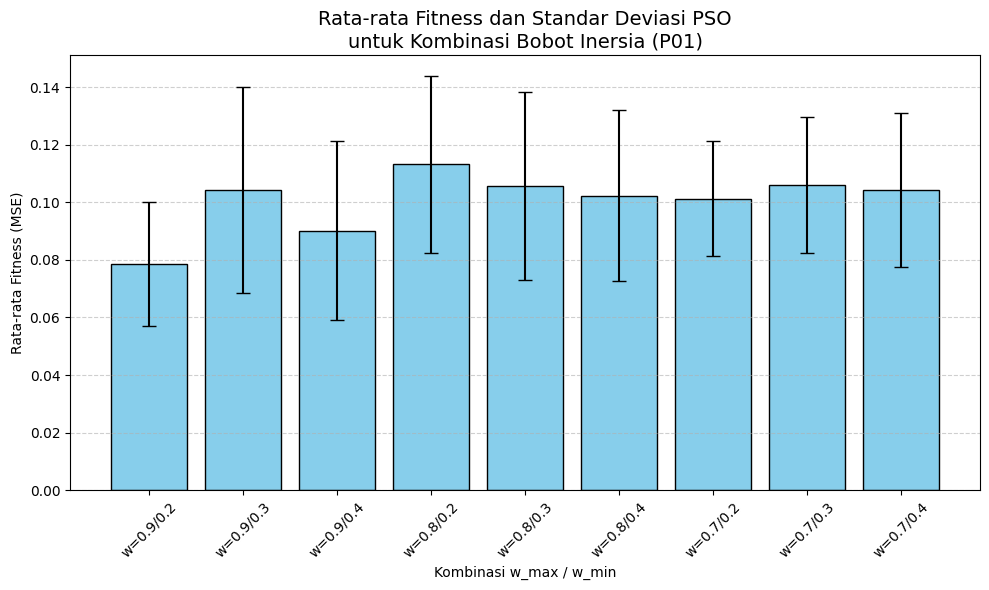

In [13]:
# Visualisasi: Bar chart dengan error bar menggunakan matplotlib
import matplotlib.pyplot as plt

# Siapkan data
kombinasi_labels = df_results['kombinasi']
mean_fitness = df_results['mean_fitness']
std_fitness = df_results['std_fitness']

# Buat figure
plt.figure(figsize=(10, 6))
bars = plt.bar(kombinasi_labels, mean_fitness, yerr=std_fitness, capsize=5, color='skyblue', edgecolor='black')

# Label dan judul
plt.title('Rata-rata Fitness dan Standar Deviasi PSO\nuntuk Kombinasi Bobot Inersia (P01)', fontsize=14)
plt.xlabel('Kombinasi w_max / w_min')
plt.ylabel('Rata-rata Fitness (MSE)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Tampilkan plot
plt.show()
